# Table of Content
1. Import libraries and dataset
2. Data preparation
3. Elbow technique
4. K-means clustering
5. Export dataframe

# 1. Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Defining path for data import
path = r'/Users/frederikeschulz-mullensiefen/Desktop/Masterfolder_Hotel Bookings'

In [3]:
# Import cleaned hotel bookings dataset 
df_bookings = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'hotel_bookings_cleaned2_wrangled.pkl'))

In [4]:
# Display settings for graphs and tables
pd.set_option('display.max_columns', None)
%matplotlib inline

In [5]:
df_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status,total_guests,total_number_nights
2,Resort Hotel,0,7,2015,July,27,0,1,1,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,75.0,Check-Out,1.0,1
3,Resort Hotel,0,13,2015,July,27,0,1,1,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,75.0,Check-Out,1.0,1
4,Resort Hotel,0,14,2015,July,27,0,2,2,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,98.0,Check-Out,2.0,2
5,Resort Hotel,0,14,2015,July,27,0,2,2,0.0,0,BB,GBR,0,0,0,0,No Deposit,0,Transient,98.0,Check-Out,2.0,2
6,Resort Hotel,0,0,2015,July,27,0,2,2,0.0,0,BB,PRT,0,0,0,0,No Deposit,0,Transient,107.0,Check-Out,2.0,2


# 2. Data preparation

In [6]:
# Creating subset without categorical variables
df_subset = df_bookings[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'total_guests', 'total_number_nights']]

In [7]:
df_subset.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,total_guests,total_number_nights
2,7,0,1,1,0.0,0,0,0,0,0,75.0,1.0,1
3,13,0,1,1,0.0,0,0,0,0,0,75.0,1.0,1
4,14,0,2,2,0.0,0,0,0,0,0,98.0,2.0,2
5,14,0,2,2,0.0,0,0,0,0,0,98.0,2.0,2
6,0,0,2,2,0.0,0,0,0,0,0,107.0,2.0,2


# 3. Elbow technique

In [8]:
# Define range of potential clusters in data and k-means clusters in the assigned range
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [9]:
# Create score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))] 
score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-1656195456.4089255,
 -707583022.9270704,
 -487930503.3267289,
 -369033387.6301084,
 -305608382.5919496,
 -260607131.9878506,
 -227421550.71804792,
 -203714234.9412852,
 -183914181.1626181]

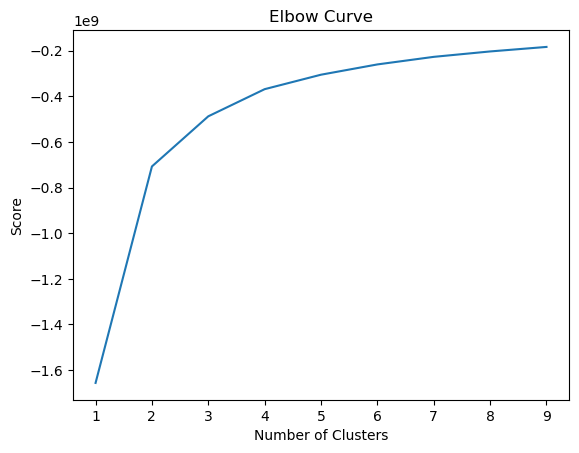

In [10]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I believe the optimal number of clusters is 4, as from 3 to 4 there is still a jump, but from 4 onwards the curve straightens out. 

# 4. K-means clustering

In [11]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [12]:
# Fit the k-means object to the data.
kmeans.fit(df_subset)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [13]:
df_subset['clusters'] = kmeans.fit_predict(df_subset)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/6r/_pj4fghj6jx_vml8b8yvngzh0000gn/T/ipykernel_1198/2632181828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['clusters'] = kmeans.fit_predict(df_subset)


In [14]:
df_subset.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,total_guests,total_number_nights,clusters
2,7,0,1,1,0.0,0,0,0,0,0,75.0,1.0,1,3
3,13,0,1,1,0.0,0,0,0,0,0,75.0,1.0,1,3
4,14,0,2,2,0.0,0,0,0,0,0,98.0,2.0,2,3
5,14,0,2,2,0.0,0,0,0,0,0,98.0,2.0,2,3
6,0,0,2,2,0.0,0,0,0,0,0,107.0,2.0,2,3


In [15]:
df_subset['clusters'].value_counts()

clusters
3    49316
2    31919
1    22516
0    14335
Name: count, dtype: int64

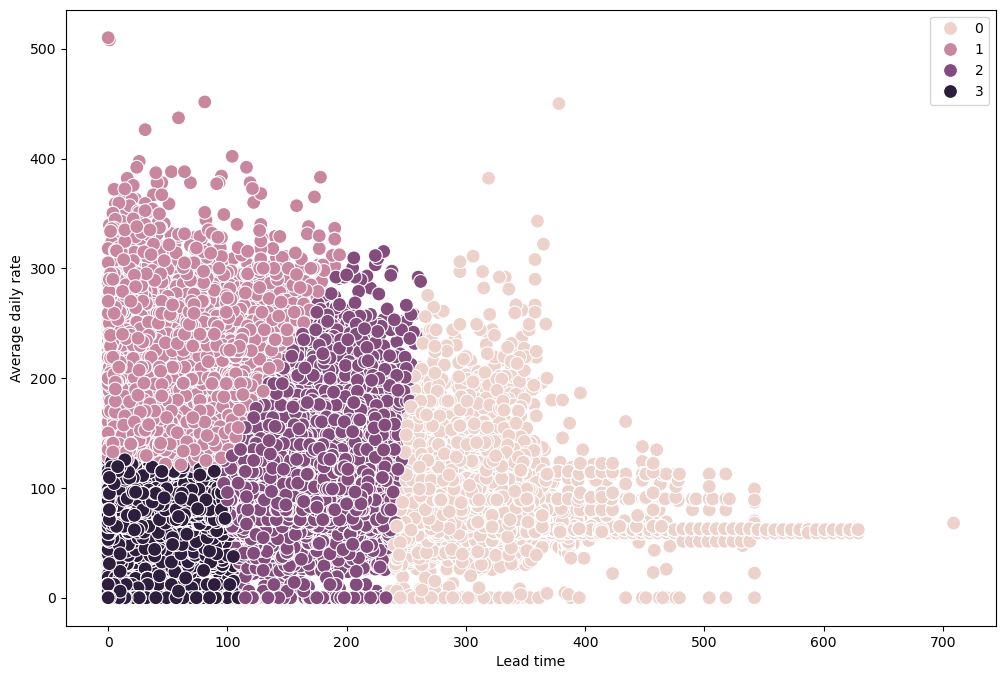

In [16]:
# Plot the clusters for the "lead_time" and "adr" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['lead_time'], y=df_subset['adr'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Lead time') 
plt.ylabel('Average daily rate') 
plt.show()

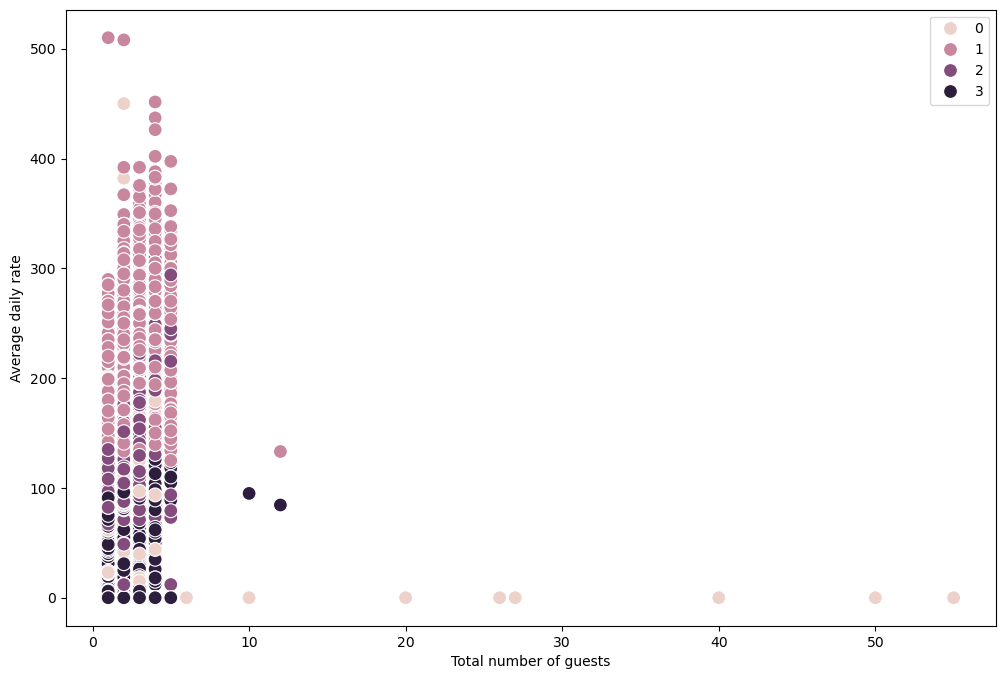

In [17]:
# Plot the clusters for the "total_guests" and "adr" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['total_guests'], y=df_subset['adr'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total number of guests') 
plt.ylabel('Average daily rate') 
plt.show()

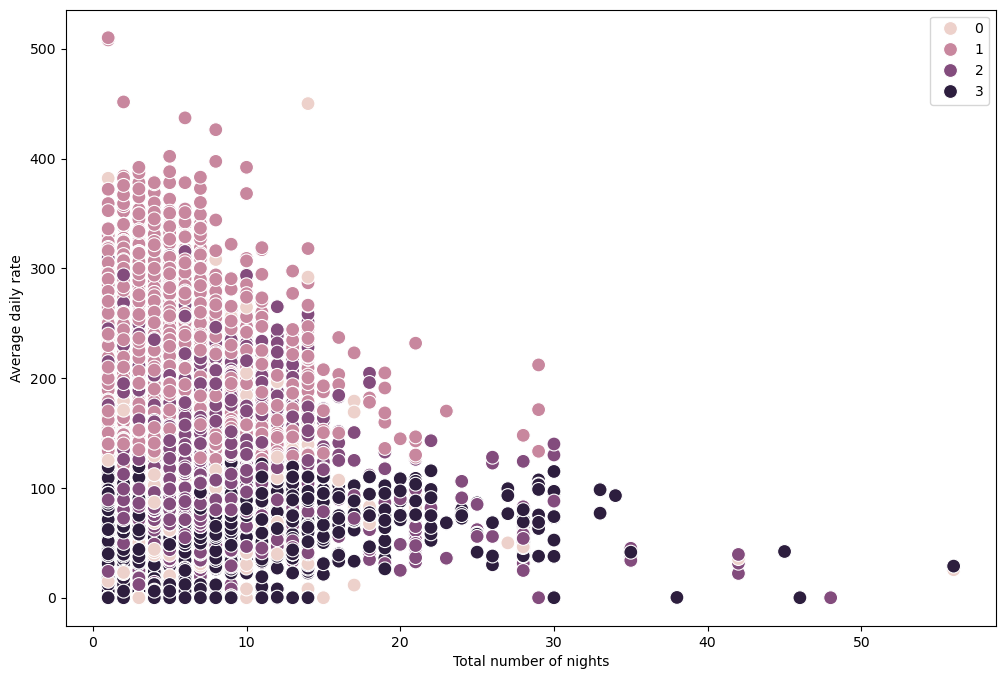

In [18]:
# Plot the clusters for the "total_number_nights" and "adr" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['total_number_nights'], y=df_subset['adr'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total number of nights') 
plt.ylabel('Average daily rate') 
plt.show()

### Interpretation plots

##### Lead time & average daily rate
When there is a very low lead time (around 0-150 days), there seem to be two different clusters, with one having very high adrs (pink) and one having low adrs (orchid). The pink clusters has the highest adrs compared to clusters with higher lead times. The pink cluster also seems to have a lot more observations than the orchid cluster. This could suggest that in general, lower lead times do lead to higher adrs, but other factors than the lead time will also play a significant role in the adr (possibly the meal plan booked etc.). 
The dark purple cluster with a medium lead time (around 120 - 220 days) does not have as many extremely high adrs, and the purple cluster with a high lead time (around 220-700 days) tends to have rather low adrs (apart from some exceptions), especially with a lead time from around 400 days onwards. 
While there do seem to be some clusters, it is clear that there must be other factors with a (more) significant impact on adr. 

##### Total number of guests & average daily rate
Here, the clusters do not really make sense, which indicates that even though there are clusters shown in the plot, they do not seem to differ a lot. 

##### Total number of nights & average daily rate
Also here, the clusters do not really make sense, which indicates that even though there are clusters shown in the plot, they do not seem to differ a lot.

In [19]:
df_subset.loc[df_subset['clusters'] == 3, 'cluster'] = 'dark purple'
df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'orchid'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'purple'
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/6r/_pj4fghj6jx_vml8b8yvngzh0000gn/T/ipykernel_1198/3364456820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[df_subset['clusters'] == 3, 'cluster'] = 'dark purple'


In [20]:
df_subset.groupby('cluster').agg({'lead_time':['mean', 'median'], 
                         'total_guests':['mean', 'median'], 
                         'total_number_nights':['mean', 'median'],
                          'adr':['mean', 'median']})

lead_time        total_guests        total_number_nights         \
                   mean median         mean median                mean median   
cluster                                                                         
dark purple   32.039500   24.0     1.780497    2.0            2.970760    2.0   
orchid       160.908518  158.0     2.016542    2.0            4.183026    3.0   
pink         326.780677  305.0     1.996721    2.0            3.608022    3.0   
purple        43.280556   35.0     2.324614    2.0            3.348241    3.0   

                    adr          
                   mean  median  
cluster                          
dark purple   77.295200   79.20  
orchid       103.370038   99.45  
pink          85.218363   80.00  
purple       168.224472  156.67

### Interpretation descriptive statistics of clusters 

As could be seen in the above plots and as described in the interpretation of the plots, there are no large differences in the mean and median between the clusters of the total guests and total number of nights. 
However, there is quite a large difference between the clusters of the lead time. It would be important to understand which other variables affect the adr when there is a low lead time, as there are two very different cluster associated with this low lead time. These other variables may for example include which meal plan they booked.

# 5. Export dataframe

In [21]:
# Export dataframes
df_subset.to_csv(os.path.join(path,'02_Data','Prepared Data', 'hotel_bookings_clusters.csv'))